Assignment: Logistic Regression Analysis on the Iris Dataset

Import the necessary libraries: seaborn, pandas, and numpy.

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np



Load the 'iris' dataset using the load_dataset method from seaborn and store it in a variable called df.

In [ ]:
from sklearn.datasets import load_iris
df = sns.load_dataset('iris')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


Explore the dataset:
Get unique species values from the 'species' column.

In [ ]:
unique = df['species'].unique()
unique

array(['setosa', 'versicolor', 'virginica'], dtype=object)

Generate a correlation table using the .corr() method to examine the relationship between variables.


In [ ]:
correlation = df.corr()
correlation

<ipython-input-32-b6c2249924d6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


Visualize pairwise relationships between variables using the pairplot function from seaborn.

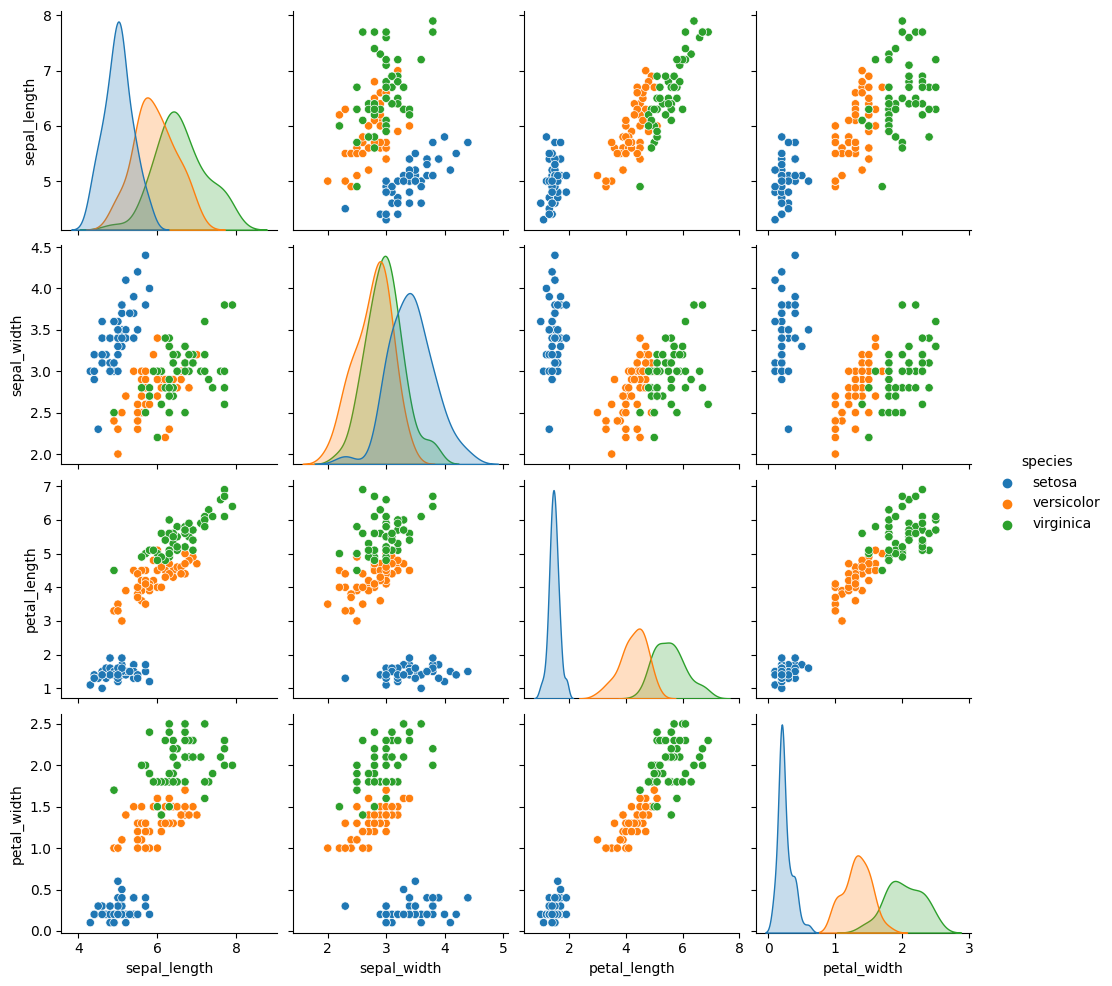

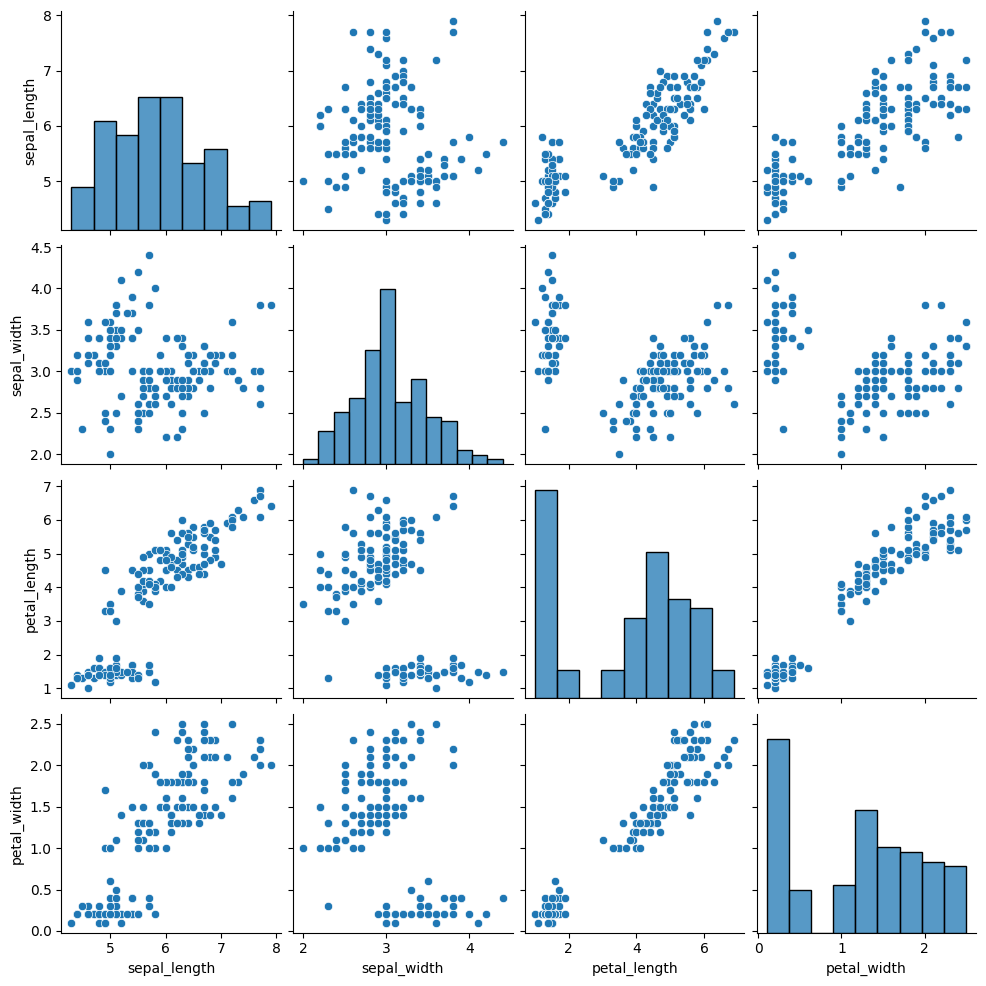

In [ ]:
sns.pairplot(df, hue='species')
sns.pairplot(df)

Prepare the dataset for binary logistic regression:
Remove rows with 'setosa' species as we are performing binary logistic classification.

In [ ]:
df_binary = df[df['species'] != 'setosa']
df_binary

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


Check for null values in the dataset and fill them with the average values of the respective column.


In [ ]:
print(df.isnull().sum())
df_filled = df.fillna(df.mean())
print(df_filled)

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64
     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


<ipython-input-35-36e2df5fa157>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_filled = df.fillna(df.mean())


Convert the string names 'versicolor' and 'virginica' to numerical values (0 and 1, respectively) for the 'species' column.

In [ ]:
df_binary['species'] = df_binary['species'].map({'versicolor': 0, 'virginica': 1})
df_binary

<ipython-input-36-785a6c4330ef>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_binary['species'] = df_binary['species'].map({'versicolor': 0, 'virginica': 1})


,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,0
51,6.4,3.2,4.5,1.5,0
52,6.9,3.1,4.9,1.5,0
53,5.5,2.3,4.0,1.3,0
54,6.5,2.8,4.6,1.5,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1


Split the dataset into independent (X) and dependent (y) parameters using the iloc function.


In [ ]:
X = df_binary.iloc[:, :-1]
y = df_binary.iloc[:, -1]


Split the data into training and testing sets using the train_test_split function from sklearn.model_selection. Set the test size to 25%.

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Create a logistic regression classifier using the LogisticRegression class from sklearn.linear_model.

In [ ]:
from sklearn.linear_model import LogisticRegression
param_grid = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']}
logreg = LogisticRegression()

Perform hyperparameter tuning using grid search with cross-validation:
python


In [ ]:
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5)

Fit the training data to the model.

In [ ]:
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']})

Make predictions on the test set.


In [ ]:
y_pred = grid_search.predict(X_test)

Calculate the accuracy score by comparing the predicted values (y_pred) with the actual values (y_test).

In [ ]:
accuracy = grid_search.score(X_test, y_test)
print("Accuracy:", accuracy)


Accuracy: 0.92


Print the classification report to evaluate precision, recall, and F1-score between the predicted values (y_pred) and the actual values (y_test).

In [ ]:
from sklearn.metrics import classification_report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.91      0.91      0.91        11

    accuracy                           0.92        25
   macro avg       0.92      0.92      0.92        25
weighted avg       0.92      0.92      0.92        25



After completing this logistic regression assignment, it is recommended to read about precision, recall, and F1-score in the provided link for a better